# Life cycle of machine learning project
###  data analysis
- Understand the project statement
- Data Collection
- Data check to perform 
- Exploraroty data analysis

### model development
- Understand the project statement
- Data Collection
- Data preprocessing 
- Feature engineering
- Model training
- Choose the best model
### model deployment
- structure the code in modular programming
- configure the docker image to make the code deployable
- deploy the model in aws

### 1.0 problem statement

Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

In this problem you do not have to predict actual price but a price range indicating how high the price is

dataset : url https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification

#### 2.0 Data Collection

#### 2.1 libraries for use

In [2]:
from sqlalchemy import create_engine
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

2.2 Data extraction from database

In [3]:
driver = "ODBC+Driver+17+for+SQL+Server"
server_name = "localhost"
database = "BDdatasets"
UID = "sa"
PWD = "0440"

connection_string = f"mssql+pyodbc://{UID}:{PWD}@{server_name}/{database}?driver={driver}"

engine = create_engine(connection_string)

query = "SELECT * FROM MobilePrice"

df = pd.read_sql_query( query , engine )

### 2.3 check top 5 records

In [4]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


#### 2.4 shape of dataset 

In [5]:
df.shape

(2000, 21)

#### 2.5 dataset information

#### Descripción de Columnas en el Dataset MobilePrice

##### battery_power
Capacidad de la batería en mAh (miliamperios-hora), indicando la duración potencial de la batería del dispositivo.

##### blue 
Indicador binario (1 o 0) de conectividad Bluetooth. 1 significa que el dispositivo tiene Bluetooth, y 0 significa que no.

##### clock_speed 
Velocidad del procesador en GHz, que representa la frecuencia de procesamiento del CPU del dispositivo.

##### dual_sim 
Indicador binario de capacidad para doble SIM. 1 indica que soporta dos tarjetas SIM, y 0 indica que no.

##### fc 
Resolución de la cámara frontal en megapíxeles (MP), que representa la calidad de la cámara delantera.

##### four_g 
Indicador binario de conectividad 4G. 1 significa que el dispositivo soporta 4G, y 0 significa que no.

##### int_memory 
Capacidad de memoria interna en GB, mostrando la cantidad de almacenamiento disponible para el usuario.

##### m_dep 
Profundidad del dispositivo en cm, indicando el grosor del teléfono.

##### mobile_wt 
Peso del dispositivo en gramos, proporcionando una idea de su portabilidad y peso.

##### n_cores 
Número de núcleos del procesador, que afecta la capacidad de procesamiento multitarea del dispositivo.

##### px_height 
Altura de la resolución de pantalla en píxeles, representando la dimensión vertical de la pantalla en píxeles.

##### px_width 
Ancho de la resolución de pantalla en píxeles, representando la dimensión horizontal de la pantalla en píxeles.

##### ram 
Memoria RAM en MB, que afecta la capacidad de multitarea y rendimiento del dispositivo.

##### sc_h
Altura de la pantalla en cm, indicando el tamaño físico vertical de la pantalla.

##### sc_w
Anchura de la pantalla en cm, mostrando el tamaño físico horizontal de la pantalla.

##### talk_time
Tiempo máximo de conversación en horas que el dispositivo soporta con una carga completa de batería.

##### three_g
Indicador binario de conectividad 3G. 1 significa que el dispositivo soporta 3G, y 0 significa que no.

##### touch_screen
Indicador binario de pantalla táctil. 1 indica que tiene pantalla táctil, y 0 indica que no.

##### wifi
Indicador binario de conectividad Wi-Fi. 1 significa que el dispositivo soporta Wi-Fi, y 0 significa que no.

##### price_range
Categoría de precio del dispositivo, usualmente con valores discretos (como 0, 1, 2, 3), que representan distintos rangos de precio.


#### 3.0 data check

- check missing values
- drop nulls if is necesary
- check duplicates
- drop ids
- check data types
- check the number of unique values for each column
- check statistics in the dataset
- check what columns are numerical and which are categorical
- check the diferents categories present in each categorical columns

#### 3.1 check missign values

In [6]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

#### insight 
- there is not missing values

#### 3.2 drop nulls if necesary

In [7]:
### no is necesary in this case

#### 3.3 check duplicates

In [7]:
df.duplicated().sum()

np.int64(0)

#### insight
- there is not duplicated values

#### 3.4 drop id if necesary

In [8]:
### there is not id columns

#### 3.5 check data types

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#### insight 
- all the columns are numerical
- some of the columns can be interpreted as ordinal numerical columns

#### 3.6 check the number of unique value for each column

In [10]:
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

#### insight 
- all the column all numerical, but for the context is posible interpretate the value of some columns as cateogories 

#### 3.7 check statistic in the dataset

In [11]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


#### insight
- the colums have different scales

In [12]:
df.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


#### insight
- some of the column have correlation, but for the context is not necesary drop it

#### 3.8 check what columns are numerical and which are categorical

In [13]:

categorical_columns = [column for column in df.columns if df[column].nunique()<=30 ]
numerical_columns  = [ column for column in df.columns if df[column].nunique()>30 ]

#### insight 
- due to the fact that all the columns are numerical and the context we can consider the features with less than 30 options as categoricas

#### 3.9 check categories in diffentes column

In [14]:
print(f"there is {len(categorical_columns)} numerical_columns")
print(f"{categorical_columns}")


there is 15 numerical_columns
['blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'm_dep', 'n_cores', 'pc', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range']


In [15]:
for column in categorical_columns:
    values = df[column].unique()
    print(f" colum : {column}" )
    print(f" values : {values}")
    print()

 colum : blue
 values : [0 1]

 colum : clock_speed
 values : [2.20000005 0.5        2.5        1.20000005 1.70000005 0.60000002
 2.9000001  2.79999995 2.0999999  1.         0.89999998 1.10000002
 2.5999999  1.39999998 1.60000002 2.70000005 1.29999995 2.29999995
 2.         1.79999995 3.         1.5        1.89999998 2.4000001
 0.80000001 0.69999999]

 colum : dual_sim
 values : [0 1]

 colum : fc
 values : [ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19]

 colum : four_g
 values : [0 1]

 colum : m_dep
 values : [0.60000002 0.69999999 0.89999998 0.80000001 0.1        0.5
 1.         0.30000001 0.40000001 0.2       ]

 colum : n_cores
 values : [2 3 5 6 1 8 4 7]

 colum : pc
 values : [ 2  6  9 14  7 10  0 15  1 18 17 11 16  4 20 13  3 19  8  5 12]

 colum : sc_h
 values : [ 9 17 11 16  8 13 19  5 14 18  7 10 12  6 15]

 colum : sc_w
 values : [ 7  3  2  8  1 10  9  0 15 13  5 11  4 12  6 17 14 16 18]

 colum : talk_time
 values : [19  7  9 11 15 10 18  5 20 12 13  2  4  3

In [16]:
features = [feature for feature in df.columns if df[feature].nunique() <=10 ]
print("columns and values")
print()
for col in df[features].columns:
    values = df[col].unique()
    print(f"column : {col}")
    print(f"values : {values}")
    print()

columns and values

column : blue
values : [0 1]

column : dual_sim
values : [0 1]

column : four_g
values : [0 1]

column : m_dep
values : [0.60000002 0.69999999 0.89999998 0.80000001 0.1        0.5
 1.         0.30000001 0.40000001 0.2       ]

column : n_cores
values : [2 3 5 6 1 8 4 7]

column : three_g
values : [0 1]

column : touch_screen
values : [0 1]

column : wifi
values : [1 0]

column : price_range
values : [1 2 3 0]



#### insights
- the values of the columns can be considered as ordinal values
- the label can should be considered as categorical label

### 4.0 exploratory data analysis

visualize data using 
- pie char 
- hist plot
- boxplot

#### 4.1 pie char

pie char for binary columns



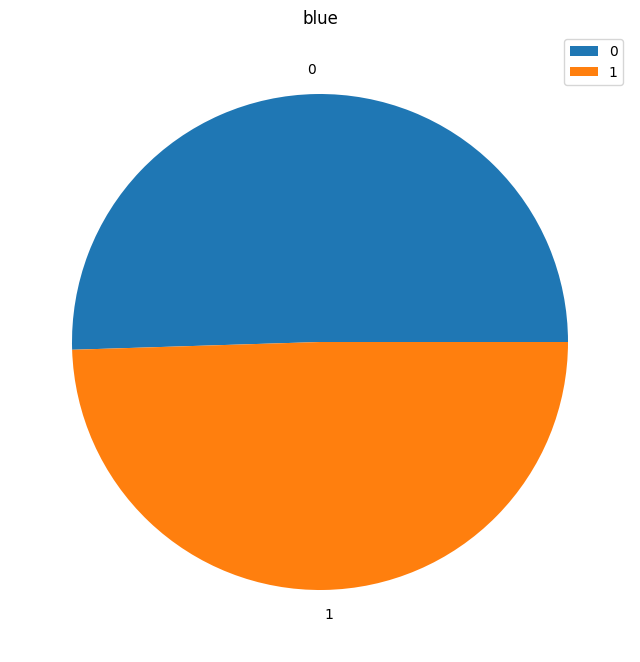

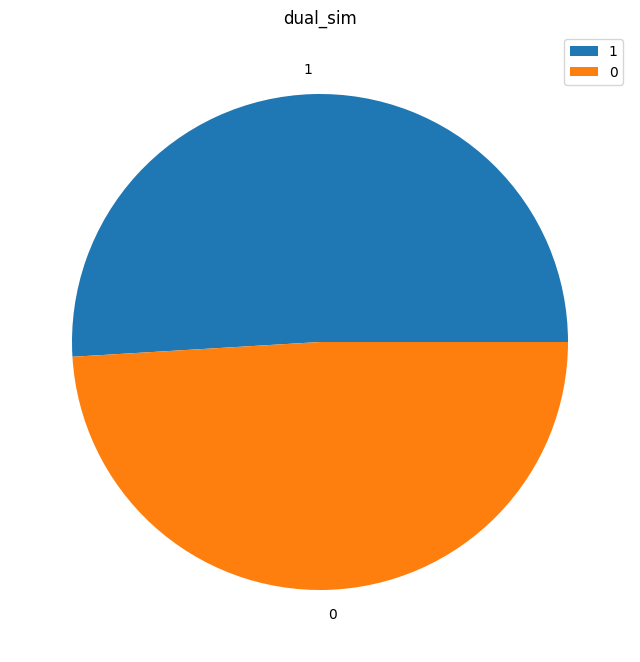

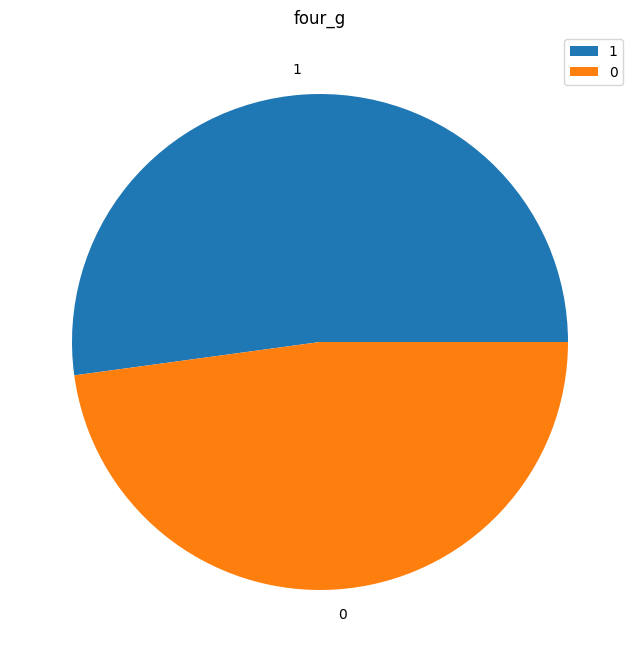

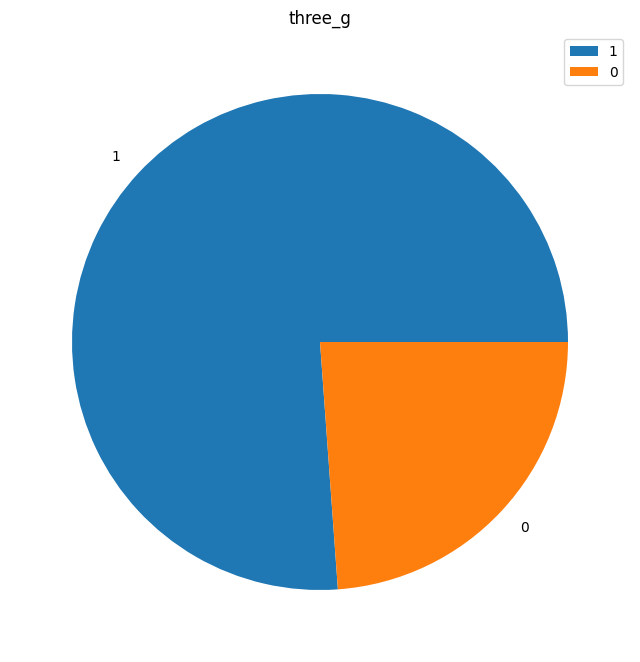

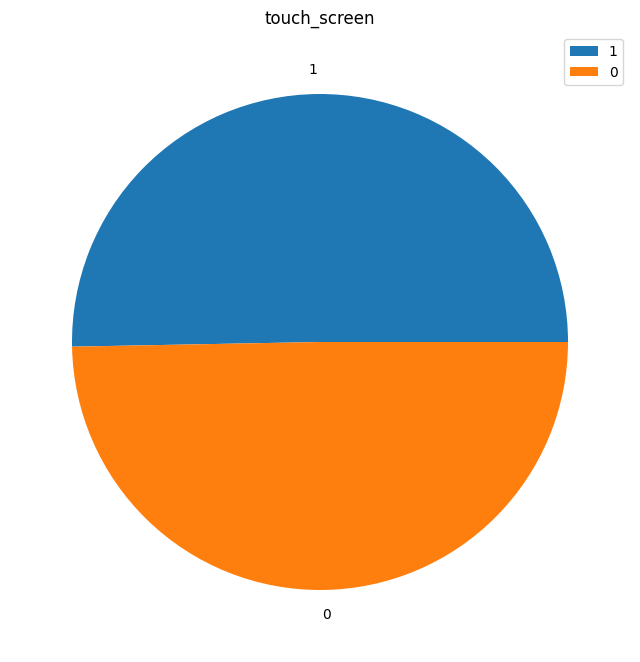

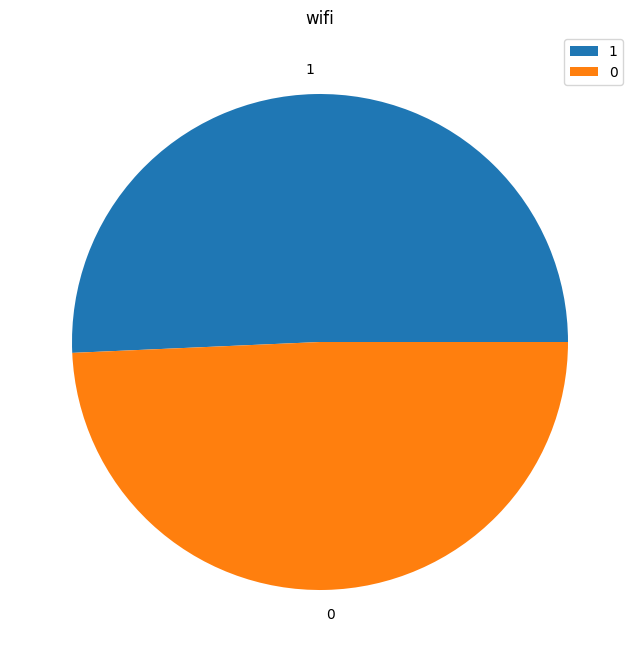

In [17]:
#binary classes
columns = [column for column in df.columns if df[column].nunique()<=2]
print("pie char for binary columns")
print()
for column in columns:
    plt.figure(figsize = ( 8 , 10))
    values = df[column].value_counts()
    categories = df[column].value_counts().index
    plt.pie(values , labels = categories  )
    plt.title(column)
    plt.legend(categories , loc = "upper right")
    plt.show()

#### insights
- the binary categories are equally same distributed

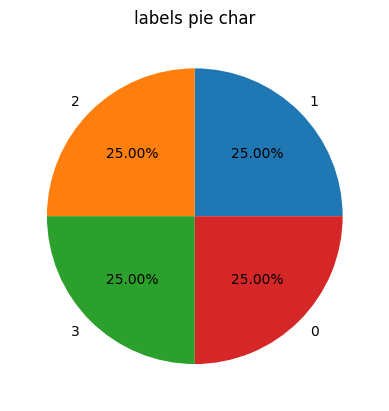

In [18]:
#pie char for the label
values = df["price_range"].value_counts() 
categories = df["price_range"].value_counts().index
plt.pie(values , labels = categories , autopct = "%1.2f%%")
plt.title("labels pie char")
plt.show()

#### insights:
- the label is equally distributed

#### 4.2 hist plot

histplot for numerical columns



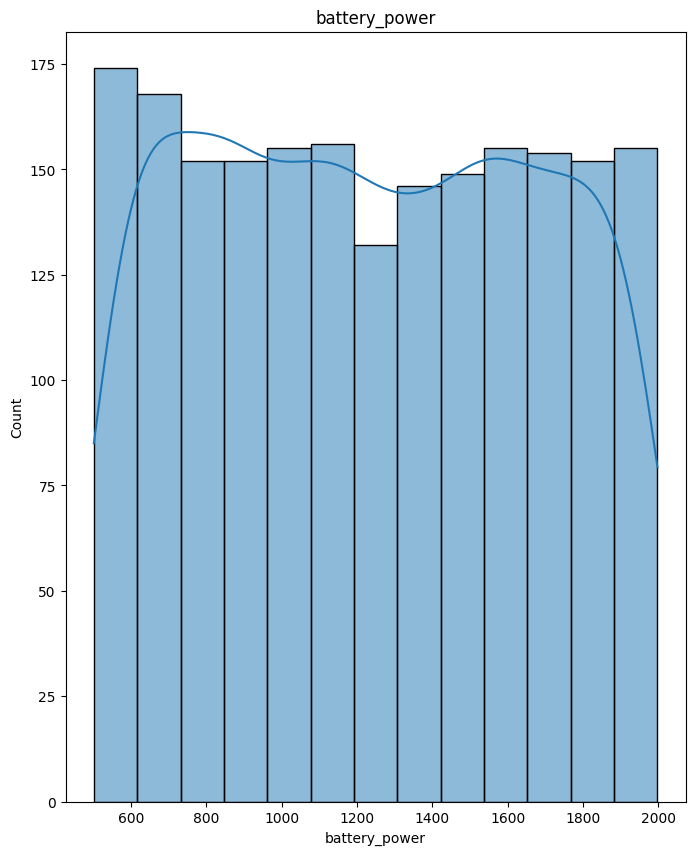

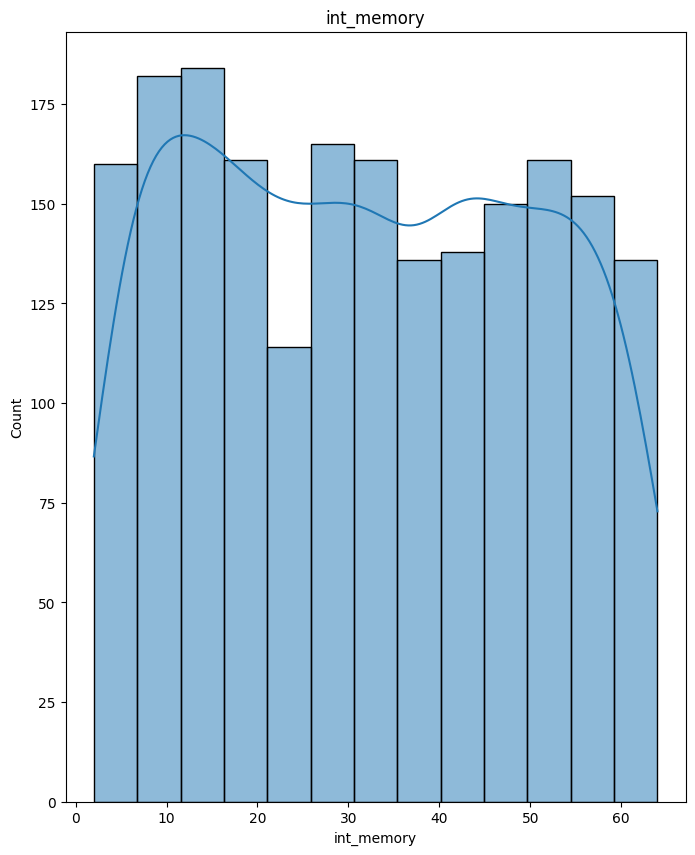

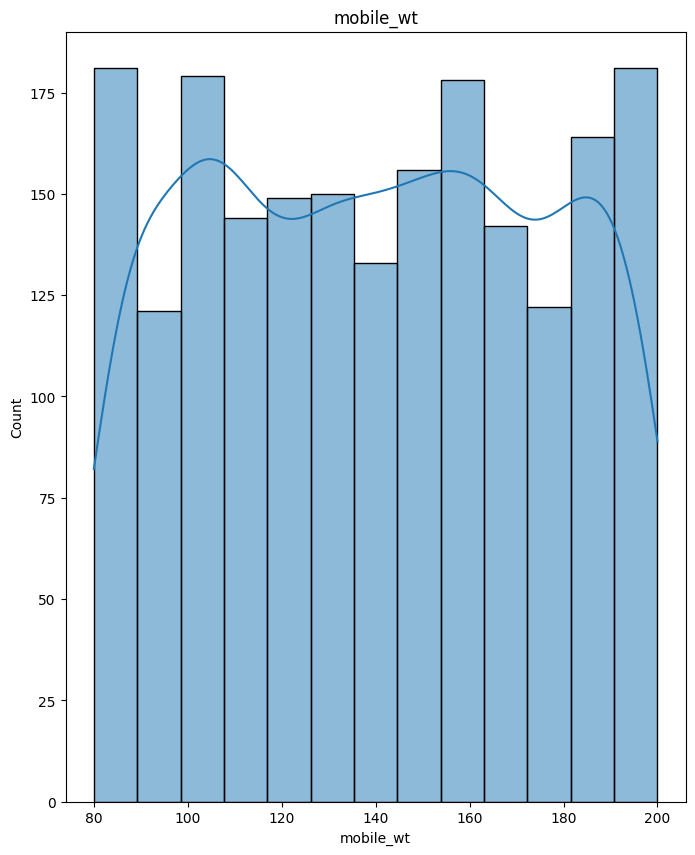

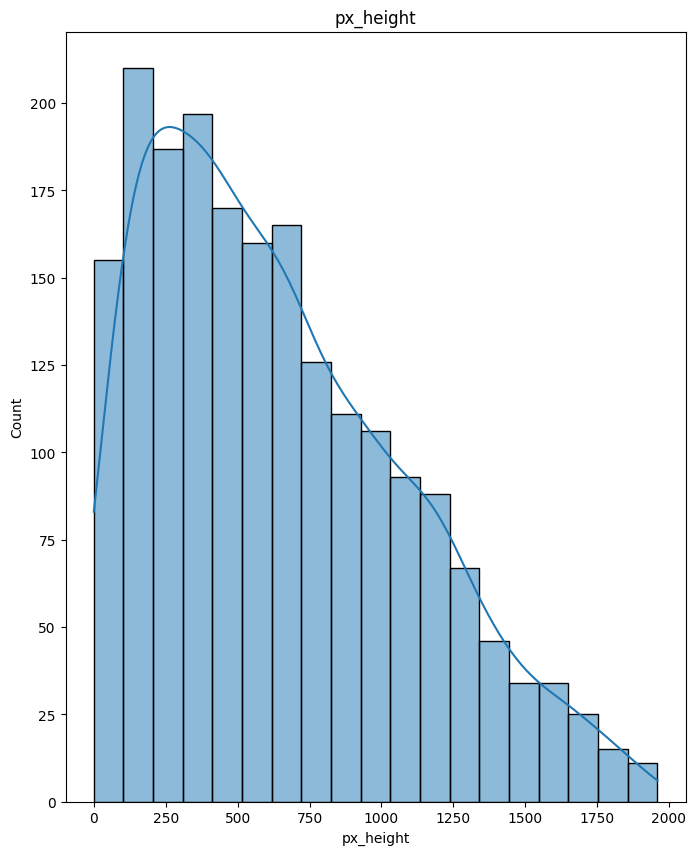

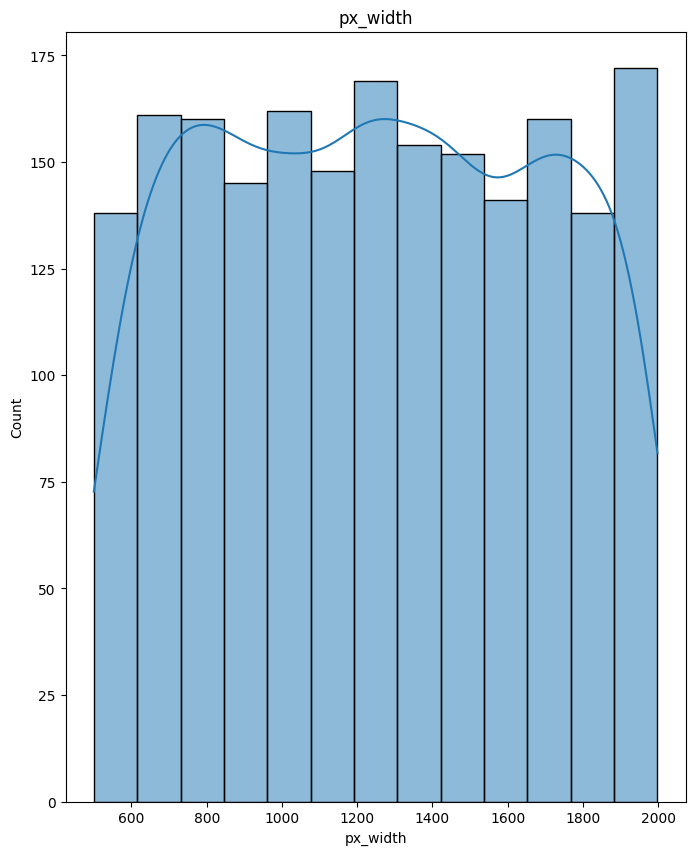

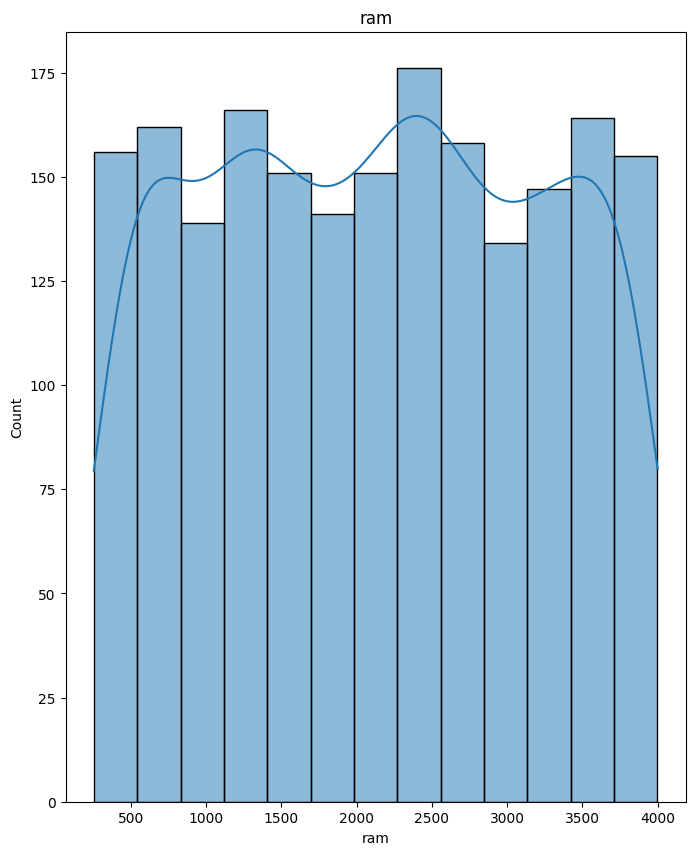

In [59]:
print("histplot for numerical columns")
print()
for column in numerical_columns:
    plt.figure(figsize = ( 8 , 10))
    sns.histplot(data = df , x = column , kde = True  )
    plt.title(column)
    plt.show()

#### insights:
- the most of the columns are normal distributed

#### 4.3 boxplot

histplot for numerical columns



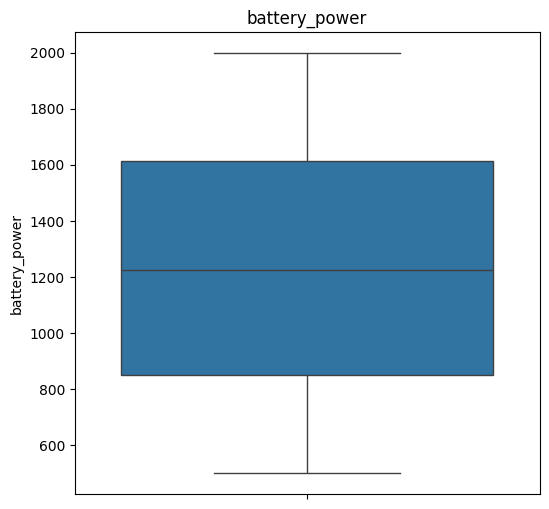

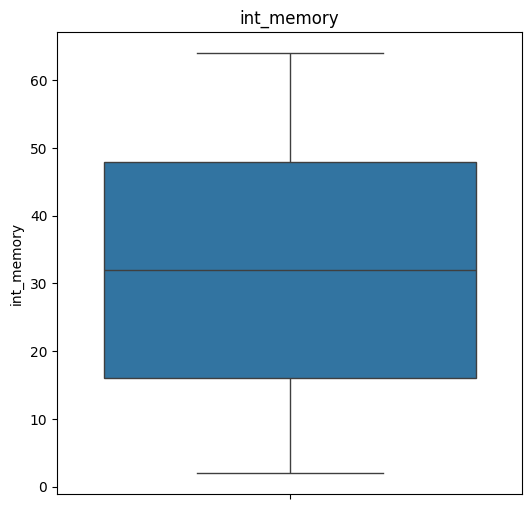

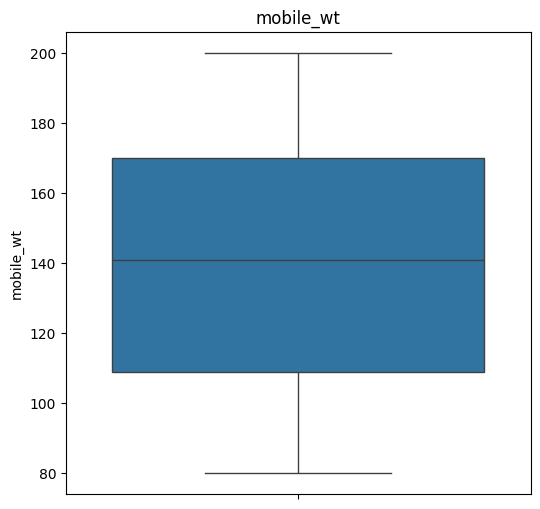

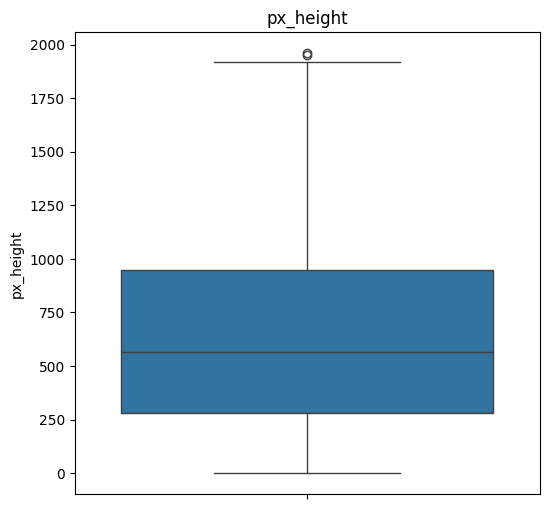

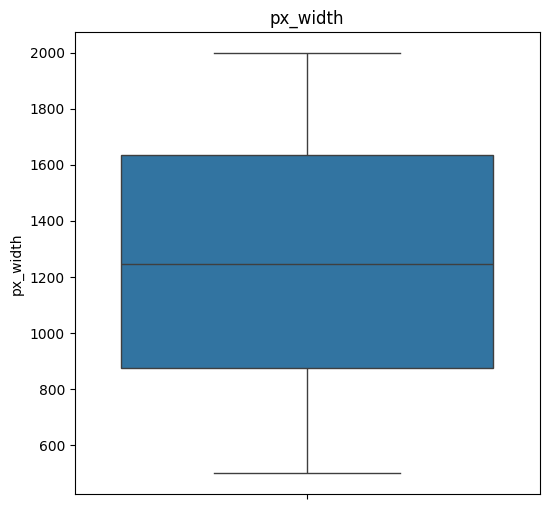

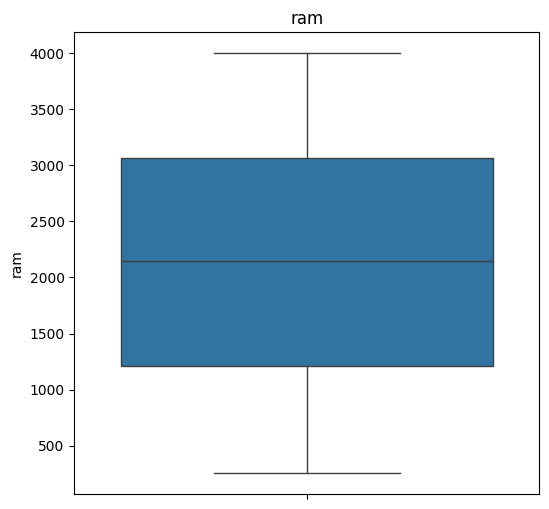

In [63]:
print("histplot for numerical columns")
print()
for column in numerical_columns:
    plt.figure(figsize = ( 6 , 6))
    sns.boxplot(data = df , y = column  )
    plt.title(column)
    plt.show()

#### insights
- the columns px_height is the only one that have some few outlier

<h1>eda end</h1> 